# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [8]:
import pandas as pd
try:
    data = pd.read_csv('datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(100)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14,5150000.0,47.0,2018-08-06T00:00:00,2,2.75,9.0,28.1,9,False,...,7.0,2.0,Санкт-Петербург,10142.0,13743.0,2.0,751.0,1.0,881.0,34.0
96,20,8780000.0,78.3,2018-08-24T00:00:00,3,2.50,15.0,51.0,9,NaN,...,11.0,NaN,Санкт-Петербург,52108.0,16333.0,0.0,NaN,1.0,746.0,31.0
97,15,4898000.0,146.0,2019-02-12T00:00:00,4,NaN,2.0,77.0,2,NaN,...,13.0,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,34.0
98,11,11700000.0,80.0,2014-12-10T00:00:00,3,NaN,5.0,55.1,3,NaN,...,11.0,0.0,Санкт-Петербург,11248.0,8767.0,1.0,666.0,0.0,NaN,831.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<AxesSubplot:ylabel='Frequency'>

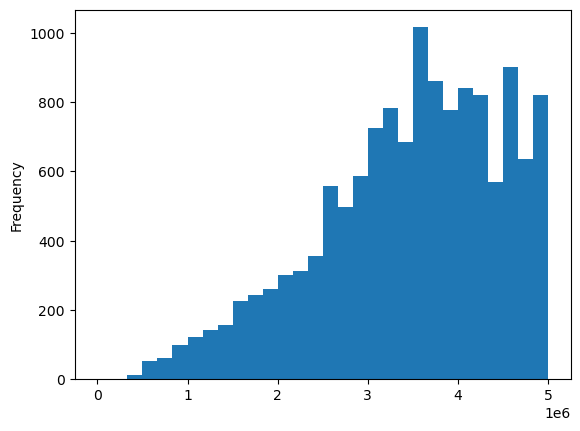

In [10]:
data['last_price'].plot(y='ceiling_height', kind='hist',
                        bins=30, range=(0, 5000000))

Строк у нас 23699, а в некоторых колонках значений меньше. в которых меньше. пустые значения.

 1.   ceiling_height        14504 non-null  float64
 2.   floors_total          23613 non-null  float64
 3.   living_area           21796 non-null  float64
 4.   is_apartment          2775 non-null   object 
 5.   kitchen_area          21421 non-null  float64
 6.   balcony               12180 non-null  float64
 7.   locality_name         23650 non-null  object 
 8.   airports_nearest      18157 non-null  float64
 9.   cityCenters_nearest   18180 non-null  float64
 10.  parks_around3000      18181 non-null  float64
 11.  parks_nearest         8079 non-null   float64
 12.  ponds_around3000      18181 non-null  float64
 13.  ponds_nearest         9110 non-null   float64
 14.  days_exposition       20518 non-null  float64
 
  1. living_area            -- надо обязательно восстановить, ибо это ключевой показатель
  2. kitchen_area           -- надо обязательно восстановить, ибо это ключевой показатель
  3. floors_total           -- надо обязательно восстановить, ибо это ключевой показатель

  
  
Надо конвертнуть в дату  first_day_exposition.
Тут is_apartment  значения либо истина либо ложь. значит надо конвертнуть в типа bool.

Далее float64 смысла нет ибо тут только целые значения (int) могут быть:
1. balcony 
2. floors_total
3. parks_around3000 
4. ponds_around3000
5. days_exposition




### Предобработка данных

In [11]:
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

Тут не много пропусков, можно заменить на 0 и конвертним в int.

In [12]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [13]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)

Конвертним first_day_exposition.

In [14]:
data['balcony'] = data['balcony'].fillna(0).astype('int')

Не представляется возможным восстановить пропуски, но строки нужны, поставим 0 и конвертнём.

In [15]:
data.loc[(data['rooms'] == 0) & (data['studio'] == 0),'rooms']=1

Rooms пропусков нету, но есть 0. если студия оставляем 0 иначе 1

In [16]:
data['locality_name'].unique()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е').str.lower()

Убрём 'ё', ибо посёлок и поселок там много.

In [17]:
data.loc[data['floors_total'].isna(),'floors_total']= data['floors_total'].median()
   
def floor_total(income):
    try:
        floors_total = income['floors_total']
        floor = income['floor']
        if floor > floors_total:
            return floors_total
        else:
            return floor 
    except:
        pass    
data['floor'] = data.apply(floor_total, axis = 1)

мало пропусков, берем медианну.

In [18]:
data['floors_total'] = data['floors_total'].astype('int')

Конвертним в int.

In [19]:
data.loc[data['ceiling_height'] > 10,
         'ceiling_height'] = data['ceiling_height']/10
data.loc[data['ceiling_height'] < 2,
         'ceiling_height'] = data['ceiling_height'].median()

высота потолков. все значение у кого выше 10, я предполагаю, что это опечатки. то дели на 10, грубо говоря переноси запятую. Ну и ниже 2 метров тоже сомнения, но так как их единицы применил среднею.

In [20]:
floor_medians = data.pivot_table(
    index='floors_total', values='ceiling_height', aggfunc='median')

Получим медианну, для дальнейшего просчета высоты потолков.

In [21]:
for test in floor_medians.index:
    data.loc[(data['ceiling_height'].isna()) &
             (data['floors_total'] == test),
             'ceiling_height'] = floor_medians.loc[test, 'ceiling_height']

А вот заполнить пропуски ну предположим, что дома типичные, и будем ориентироватья на этажность здания от него заполним по этажности потолки.

### Посчитайте и добавьте в таблицу новые столбцы

In [22]:
data['price_meter'] = data['last_price'] / data['total_area']

In [23]:
data['day'] = data['first_day_exposition'].dt.weekday

In [24]:
data['month'] = data['first_day_exposition'].dt.month

In [25]:
data['year'] = data['first_day_exposition'].dt.year

In [26]:
def floor_type_(income):
    try:
        floors_total = income['floors_total']
        floor = income['floor']
        if floor == 1:
            return 'первый'
        elif floor == floors_total:
            return 'последний'
        elif 1 < floor < floors_total:
            return 'другой'
    except:
        pass

In [27]:
data['floor_type'] = data.apply(floor_type_, axis=1)

In [28]:
def group_type(income):
    try:
        group = income['total_area']
        if group < 30:
            return 'A'
        elif 30 <= group <= 50:
            return 'B'
        elif 50 <= group <= 80:
            return 'C'
        elif 80 <= group <= 100:
            return 'D'
        elif group > 100:
            return 'E'
    except:
        pass


data['group_area'] = data.apply(group_type, axis=1)

тут разбиваем на группы, что бы взять в дальнейшем среднею по таким групам

In [29]:
group_area = data.pivot_table(index='group_area', values='living_area')
for test in group_area.index:
    data.loc[(data['living_area'].isna()) &
             (data['group_area'] == test),
             'living_area'] = group_area.loc[test, 'living_area']

In [30]:
group_area_ = data.pivot_table(index='group_area', values='kitchen_area')
for test in group_area_.index:
    data.loc[(data['kitchen_area'].isna()) &
             (data['group_area'] == test),
             'kitchen_area'] = group_area_.loc[test, 'kitchen_area']

Заполняем пропуски, в жилой площади.

In [31]:
data['last_price'] = data['last_price']/1000

### Проведите исследовательский анализ данных

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

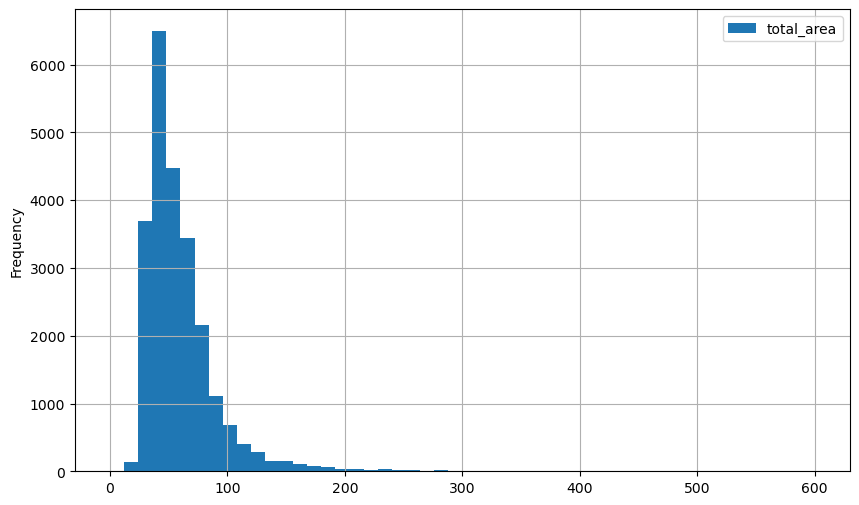

In [32]:
data.plot(y = 'total_area', kind = 'hist', bins = 50, grid=True, figsize = (10,6), range = (0,600))
data['total_area'].describe()

Eсть выбросы, но они особо не влияют. Видим максимально число квартир ~50м.

count    23699.000000
mean        34.541351
std         21.814302
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        409.700000
Name: living_area, dtype: float64

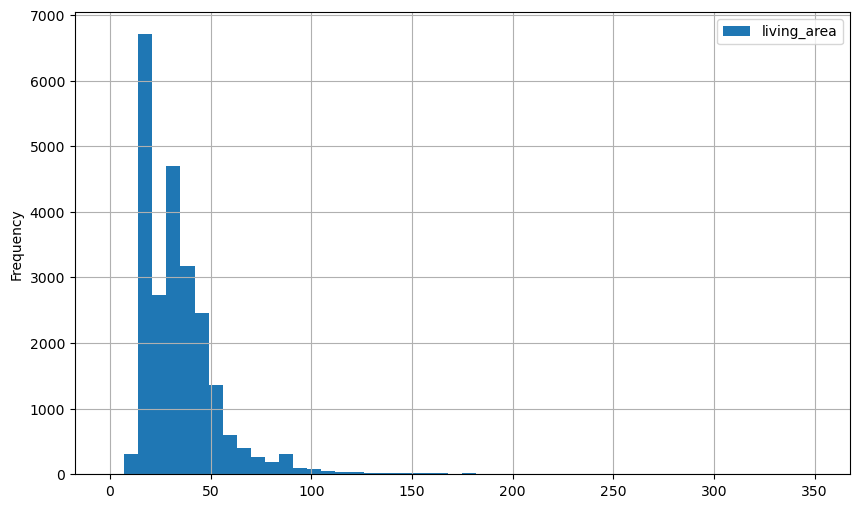

In [33]:
data.plot(y='living_area', kind='hist', bins=50,
          grid=True, figsize=(10, 6), range=(0, 350))
data['living_area'].describe()

Судя по площади квартир чаще продаются кватиры ~ 30м2. Eсть выбросы, но они особо не влияют. 

count    23699.000000
mean        10.509617
std          5.724751
min          1.300000
25%          7.100000
50%          9.000000
75%         11.800000
max        112.000000
Name: kitchen_area, dtype: float64

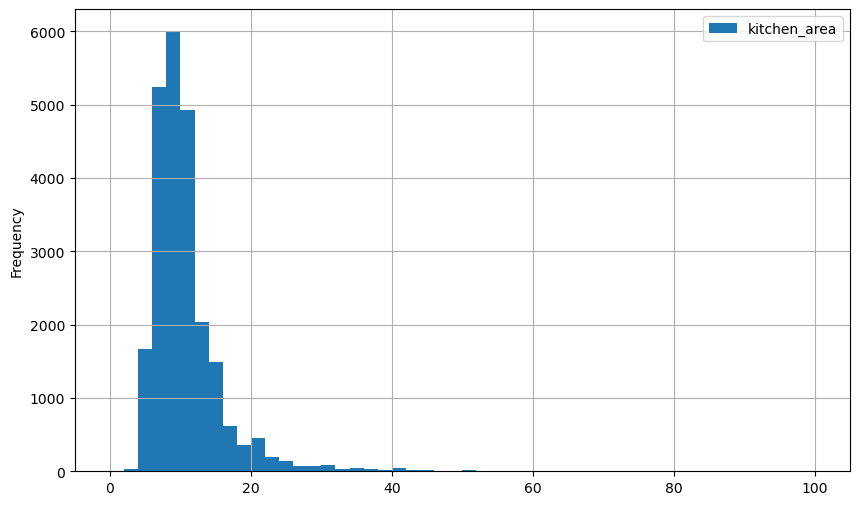

In [34]:
data.plot(y='kitchen_area', kind='hist', bins=50,
          grid=True, figsize=(10, 6), range=(0, 100))
data['kitchen_area'].describe()

Площадь кухни самая популярная  9 м2. Данные хорошие,выбросов почти нету 

count     23699.000000
mean       6541.548772
std       10887.013268
min          12.190000
25%        3400.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: last_price, dtype: float64

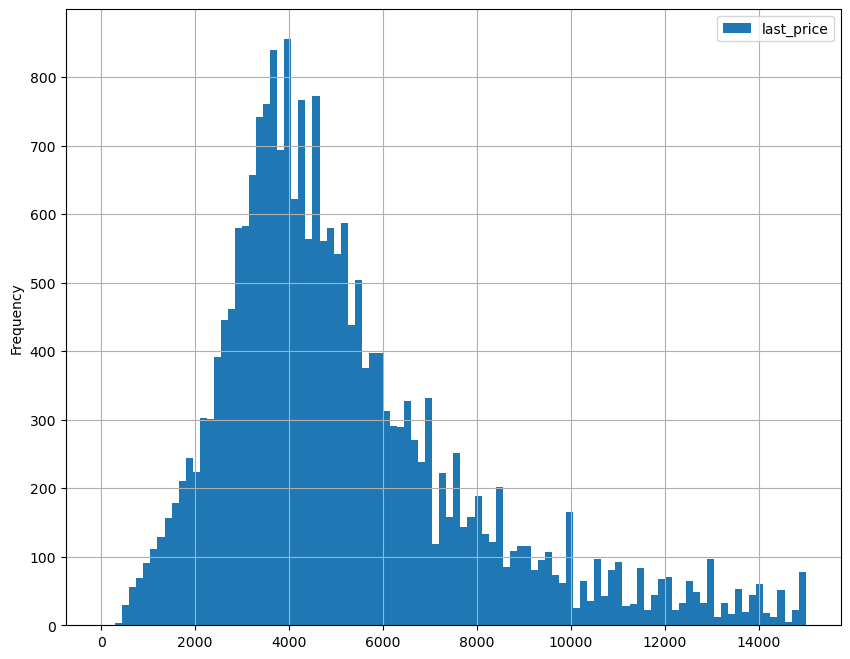

In [35]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000), figsize = (10,8))
data['last_price'].describe()

Большинство квартир, которые продаются. видим по цене ~4.5млн. 

count    23699.000000
mean         2.073125
std          1.074770
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

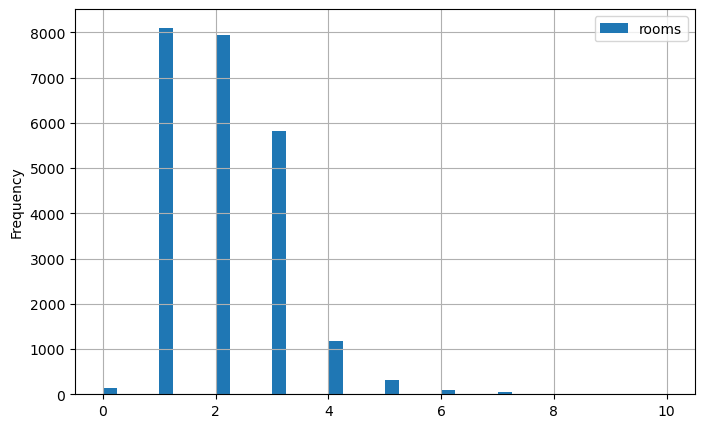

In [36]:
data.plot(y='rooms', kind='hist', bins=40,
          grid=True, figsize=(8, 5), range=(0, 10))
data['rooms'].describe()

Студий а также 5+ комнатных квартир в продаже не много. делаем вывод, что чаще всего продаются 1 и 2 комнатные квартиры

count    23698.000000
mean         2.708544
std          0.249654
min          2.000000
25%          2.550000
50%          2.650000
75%          2.750000
max         10.000000
Name: ceiling_height, dtype: float64

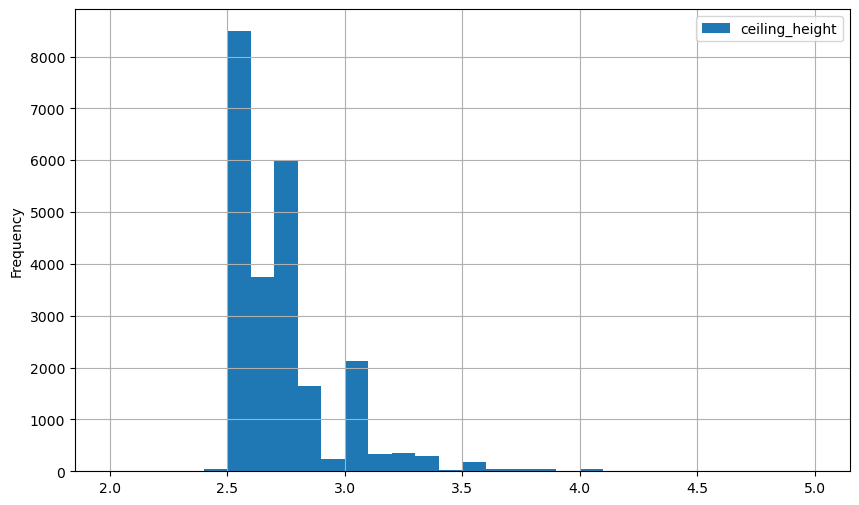

In [37]:
data.plot(y='ceiling_height', kind='hist', bins=30,
          grid=True, figsize=(10, 6), range=(2, 5))
data['ceiling_height'].describe()

Видим средняя по потолкам 2,7 .есть небольшой пик на 3м+, тут мы упираемся в какие -то типовые данные. ну а дальше явно спад ибо квартир с высотой потолков выше 3,5 крайне мало

count    23699.00000
mean         5.88143
std          4.86739
min          1.00000
25%          2.00000
50%          4.00000
75%          8.00000
max         33.00000
Name: floor, dtype: float64

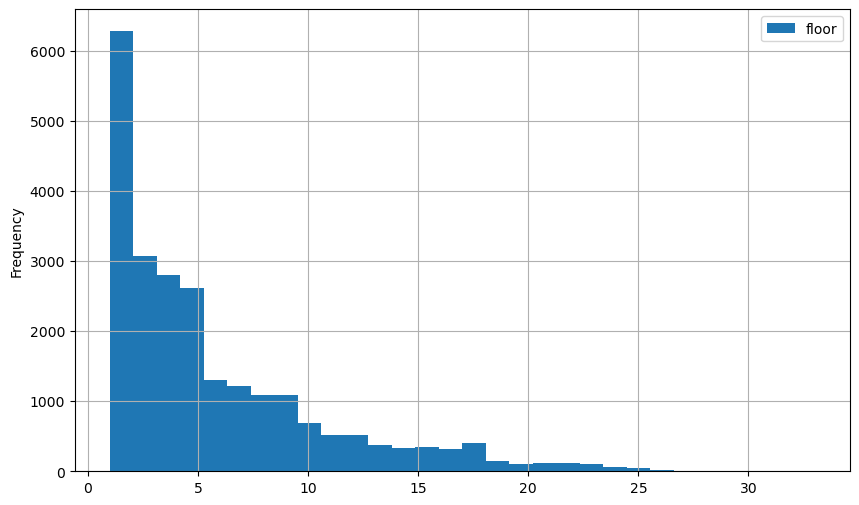

In [38]:
data.plot(y='floor', kind='hist', bins=30,
          grid=True, figsize=(10, 6), range=(1, 33))
data['floor'].describe()

Тут выведем 2 графика. Видеть тенденцию, что чем выше этаж тем меньше квартир в продаже

<AxesSubplot:ylabel='Frequency'>

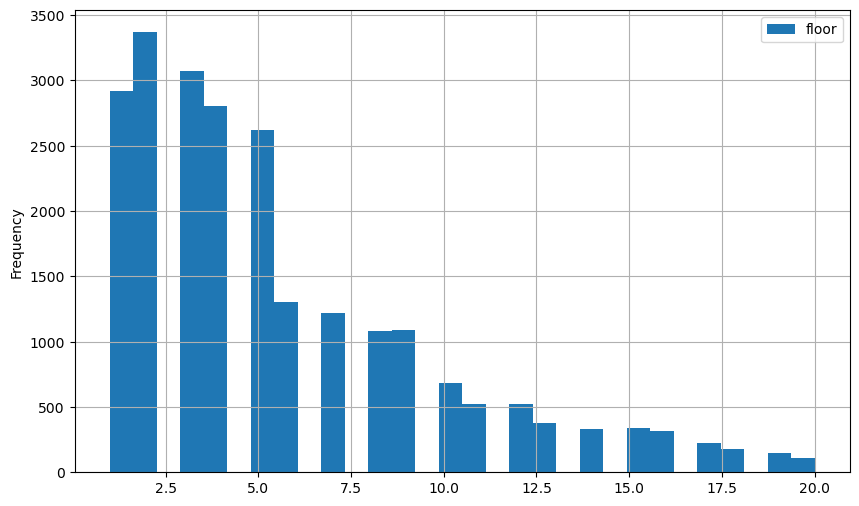

In [39]:
data.plot(y='floor', kind='hist', bins=30,
          grid=True, figsize=(10, 6), range=(1, 20))

квартир в продаже на 2 этаже больше всего. дальше на спад.

<AxesSubplot:>

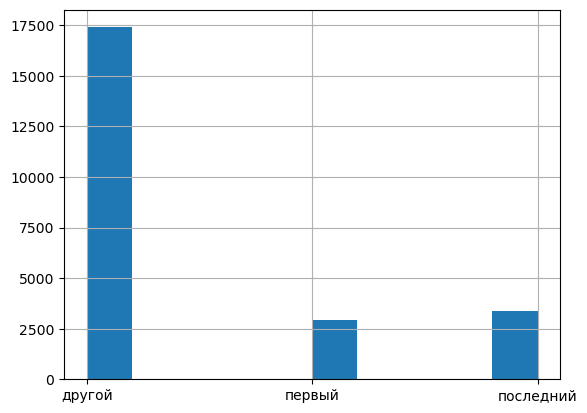

In [40]:
data['floor_type'].hist()

Добавил. тут наблюдаем, что первый и последние этажи в сравнении с остальными крайне не популярны.

<AxesSubplot:ylabel='Frequency'>

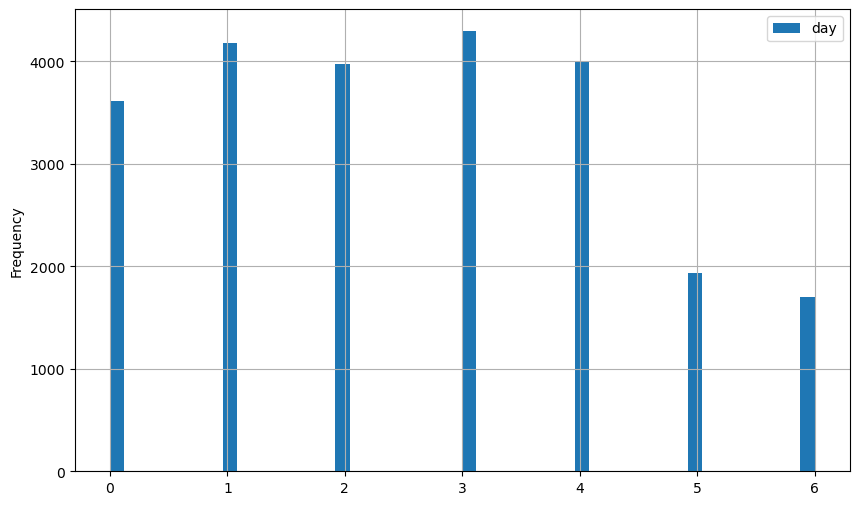

In [41]:
data.plot(y='day', kind='hist', bins=50,
          grid=True, figsize=(10, 6), range=(0, 6))

очевидно, в выходные реже выкладывают обьявления о продаже.

<AxesSubplot:ylabel='Frequency'>

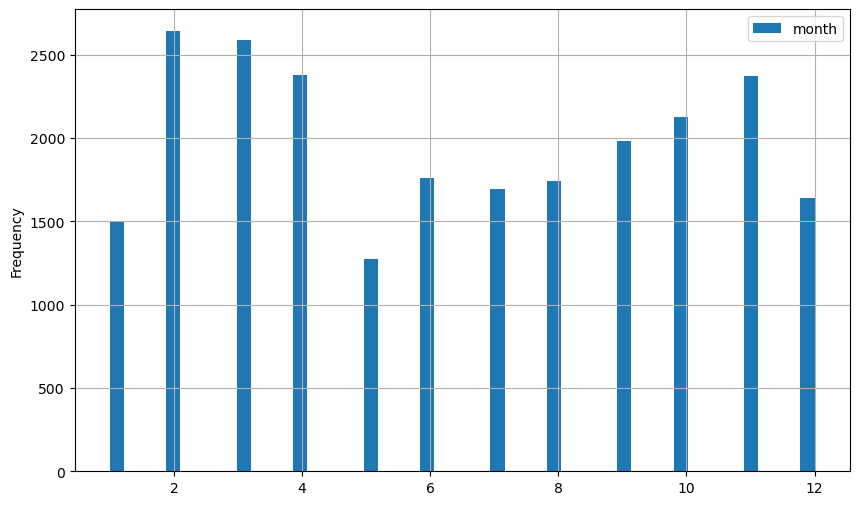

In [42]:
data.plot(y='month', kind='hist', bins=50,
          grid=True, figsize=(10, 6), range=(1, 12))

По данному графику понимаем, что количество обьявлений зависит от сезоности.
так например 2,3,4 месяц очень популярны, к лету количество снижается... и после отдых в конце лета снова идёт в рост.
ну и к концу года и до 2 месяца затихает...

count    23699.000000
mean      2017.367146
std          1.039771
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: year, dtype: float64

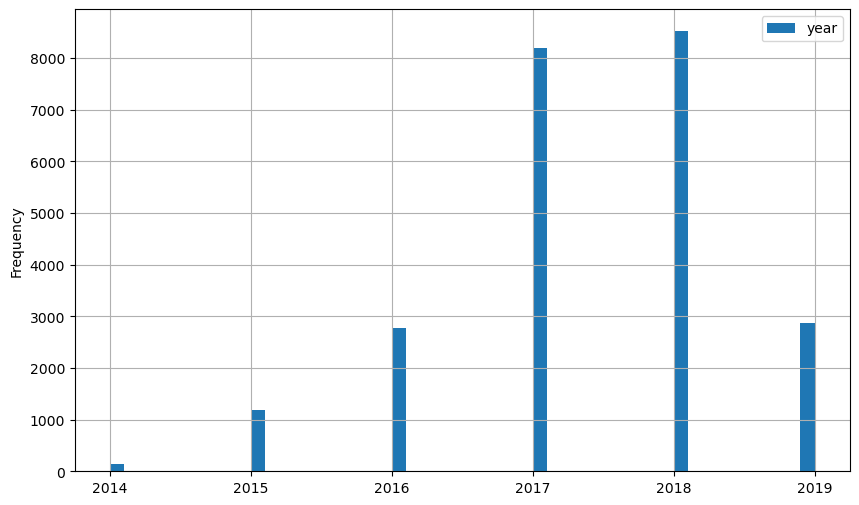

In [43]:
data.plot(y='year', kind='hist', bins=50, grid=True, figsize=(10, 6))
data['year'].describe()

Вывод: Больше всего недвижимости общей площадью около 50м2. в тоже время жилая у них порядка 30м. и 9м кухней, потолками высотой 2.7 м
Ценой ~4,5млн.. Чаще продаются 1 и 2 комнатные квартиры. Не на крайних этажах, что вполне обьяснимо квартир на крайних этажах по статисктике будет меньше=)
и ещё можем делать вывод о сезоности... летом и в зимниии месяцы активность ниже.

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

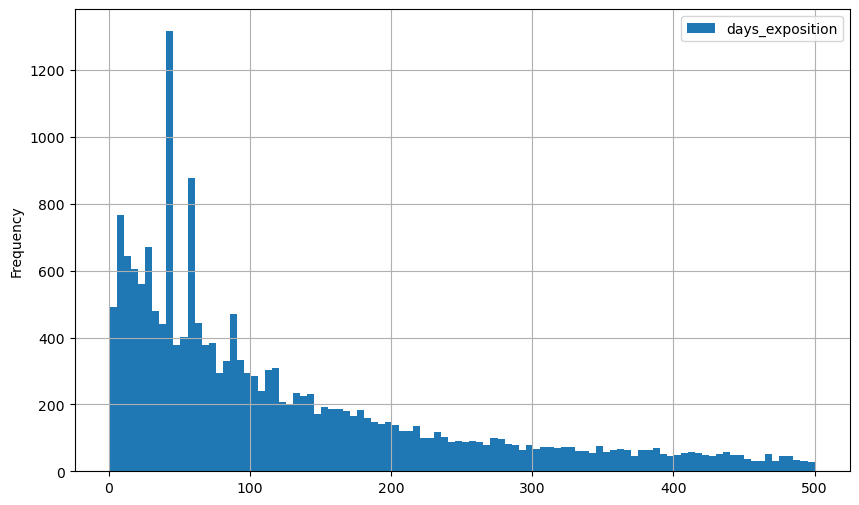

In [44]:
data.plot(y='days_exposition', kind='hist', bins=100,
          grid=True, range=(1, 500), figsize=(10, 6))
data['days_exposition'].describe()

5 пиков выделаяются, надо посмотреть в разреве 100 дней

<AxesSubplot:ylabel='Frequency'>

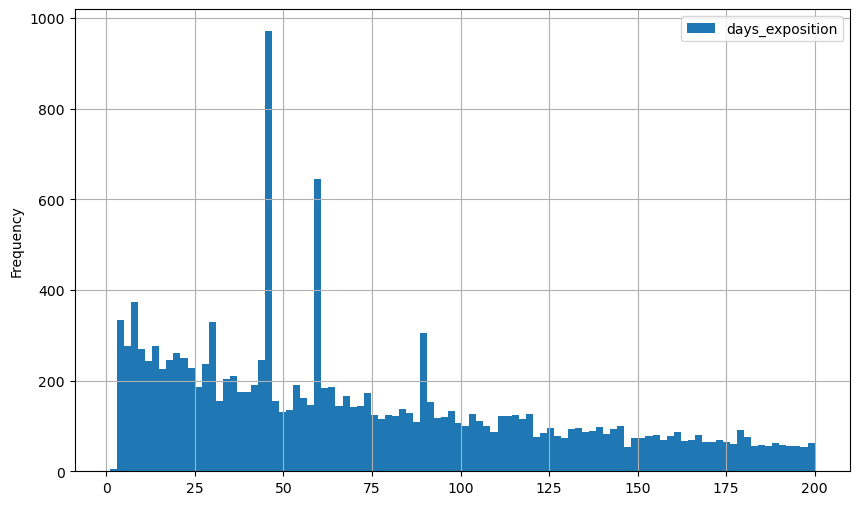

In [45]:
data.plot(y='days_exposition', kind='hist', bins=100,
          grid=True, range=(1, 200), figsize=(10, 6))

count    22077.000000
mean       164.027404
std        219.391854
min          0.000000
25%         19.000000
50%         83.000000
75%        214.000000
max       1580.000000
Name: days_exposition, dtype: float64

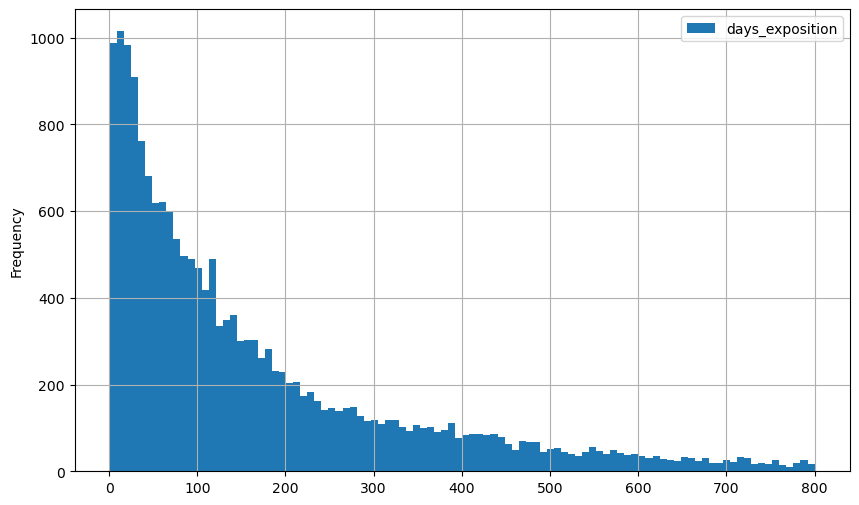

In [46]:
data_good3 = data.loc[(data['days_exposition'] != 45) &
                      (data['days_exposition'] != 60) &
                      (data['days_exposition'] != 90)]
data_good3.plot(y='days_exposition', kind='hist', bins=100,
                grid=True, range=(1, 800), figsize=(10, 6))
data_good3['days_exposition'].describe()

In [47]:
data_good3['days_exposition'].median()

83.0

Уберём выбросы то
медианна = 83
среднее  = 164
Быстрые продажи от 3 до 19
Долгие от 400 и дальше. 45,60,90 плафторма в эти дни  снимает объявления

0.6536750579657246
0.6536750579657247


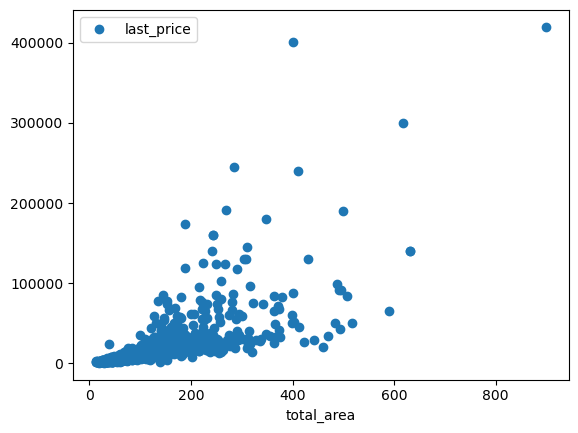

In [48]:
area_price = data.pivot_table(
    index='total_area', values='last_price', aggfunc='median')
area_price.plot(y='last_price', style='o')
print(data['total_area'].corr(data['last_price']))
print(data['last_price'].corr(data['total_area']))

Отношение общей площади к цене.зависимость есть. чем больше площадь ты выше цена получается, ну оно и логично...
Судя по корреляции связь есть.

0.5657212536300777
0.5657212536300777


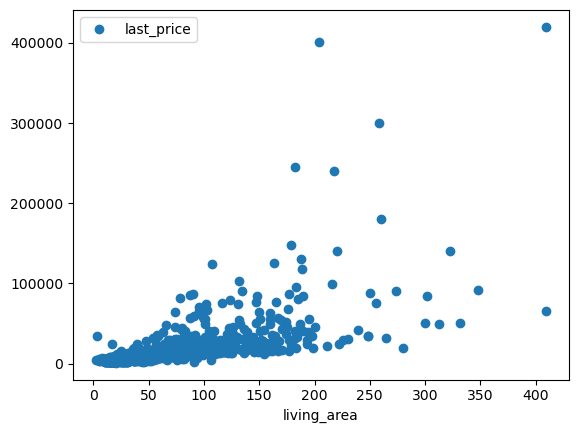

In [49]:
area_price = data.pivot_table(
    index='living_area', values='last_price', aggfunc='median')
area_price.plot(y='last_price', style='o')
print(data['living_area'].corr(data['last_price']))
print(data['last_price'].corr(data['living_area']))

Отношение жилой площади к цене, результат похож.
судя по корреляции тут зависимост ещё меньше

0.46988733447195613
0.46988733447195613


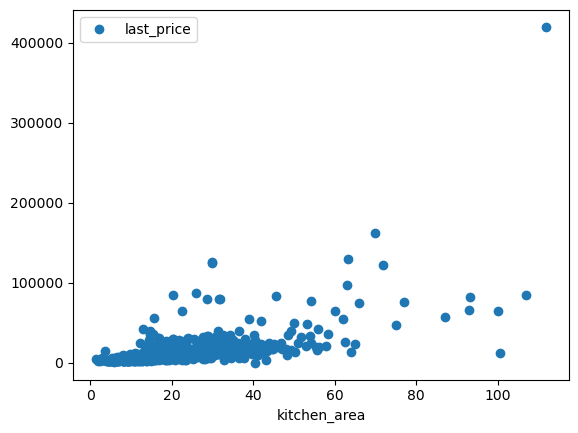

In [50]:
area_price = data.pivot_table(
    index='kitchen_area', values='last_price', aggfunc='median')
area_price.plot(y='last_price', style='o')
print(data['kitchen_area'].corr(data['last_price']))
print(data['last_price'].corr(data['kitchen_area']))

если откинуть выбросы, то не однозначно. Считаю, что не значительно.
Корреляция не значительна

0.36401203449989167
0.3640120344998916


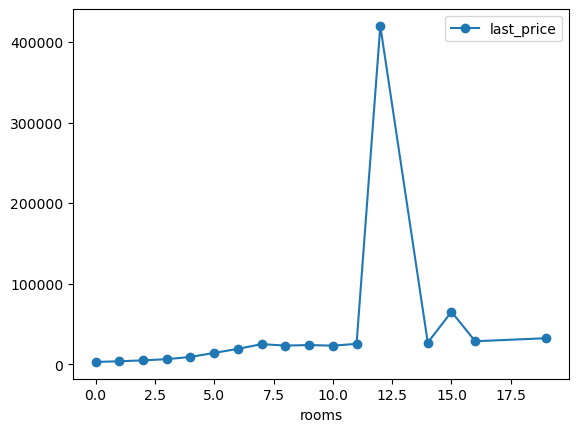

In [51]:
area_price = data.pivot_table(
    index='rooms', values='last_price', aggfunc='median')
area_price.plot(y='last_price', style='o-')
print(data['rooms'].corr(data['last_price']))
print(data['last_price'].corr(data['rooms']))

связи между количеством комнат и ценой нет.Только видимо вылет на 12.5
Данные подтверждаются корреляцией

<AxesSubplot:xlabel='floor_type'>

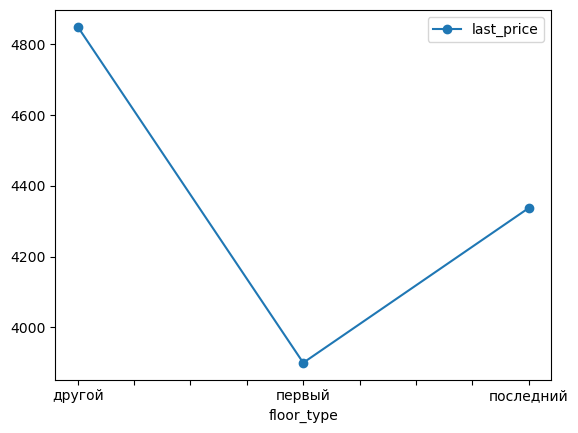

In [52]:
area_price = data.pivot_table(
    index='floor_type', values='last_price', aggfunc='median')
area_price.plot(y='last_price', style='o-')

видим , что первый этаж самый дешевый, но последний тоже дешевле рынка.

0.0015501452176215444
0.0015501452176215447


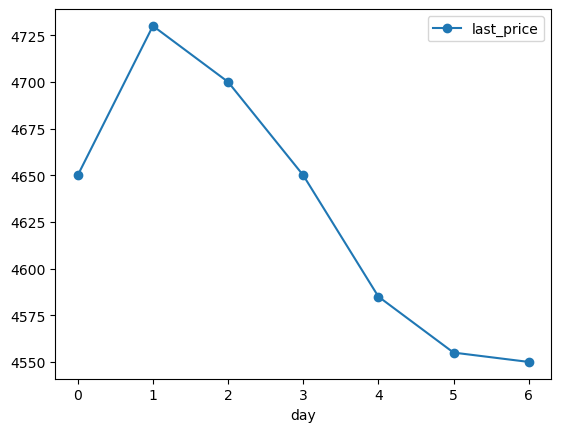

In [53]:
area_price = data.pivot_table(
    index='day', values='last_price', aggfunc='median')
area_price.plot(y='last_price', style='o-')
print(data['day'].corr(data['last_price']))
print(data['last_price'].corr(data['day']))

Видим, выставленые во вторник имеют самую высокую цену. В выходные гараздо ниже.
Но кореляция минимальна.

0.002779128750739716
0.0027791287507397157


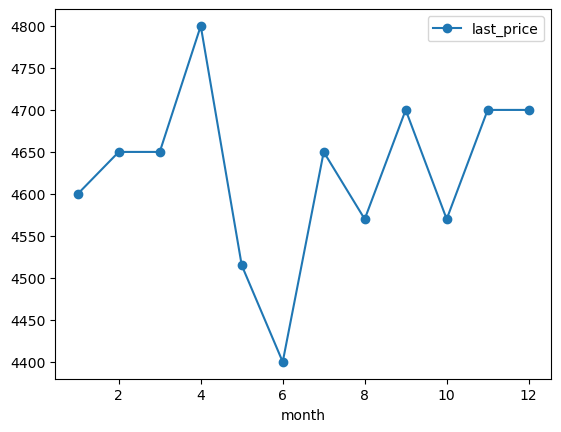

In [54]:
area_price = data.pivot_table(
    index='month', values='last_price', aggfunc='median')
area_price.plot(y='last_price', style='o-')
print(data['month'].corr(data['last_price']))
print(data['last_price'].corr(data['month']))

Явно, видно провал в летнии месяцы, цена падает. а конец весны самые высокие цены. 

-0.0430890361995084
-0.0430890361995084


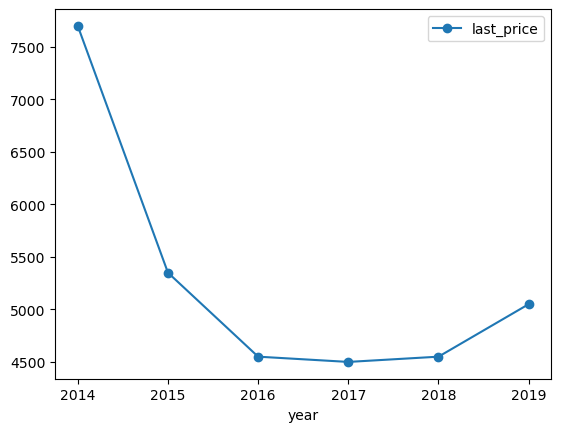

In [55]:
area_price = data.pivot_table(
    index='year', values='last_price', aggfunc='median')
area_price.plot(y='last_price', style='o-')
print(data['year'].corr(data['last_price']))
print(data['last_price'].corr(data['year']))

Видим за последние 3 года в среднем цена была на уровне,В 2018 и далее начала увеличиватся цена.

Ну это меданна цен, как вариант, у нас квартиры с разных районов и городов... воот возможно в каком-то из городов выставлено гораздо больше квартир,а сама цена нидвижимости там ниже. Корректней наверное рассматривать квартиры с одного района или города хотя бы.

In [56]:
top_data = data.pivot_table(index='locality_name',
                            values='price_meter', aggfunc=['count', 'median'])
top_data.columns = ('counts', 'median')
top_locality = top_data.sort_values('counts', ascending=False).head(10)
top_locality

,counts,median
locality_name,,
санкт-петербург,15721,104761.904762
поселок мурино,556,85878.462169
поселок шушары,440,76876.172608
всеволожск,398,65789.473684
пушкин,369,100000.000000
колпино,338,74723.748474
поселок парголово,327,91642.857143
гатчина,307,67796.610169
деревня кудрово,299,91860.465116


In [57]:
print([top_locality['median'].max()])

[104761.90476190476]


In [58]:
print([top_locality['median'].min()])

[58158.31987075929]


In [59]:
spb = data.loc[data['locality_name'] == 'санкт-петербург'].copy()
spb.loc[spb['cityCenters_nearest'].isna(
), 'cityCenters_nearest'] = spb['cityCenters_nearest'].mean()
spb['cityCenters_nearest'] = spb['cityCenters_nearest']/1000

Тут у меня был вообще како-то ад, кое как убрал предупреждение питона.


<AxesSubplot:xlabel='cityCenters_nearest'>

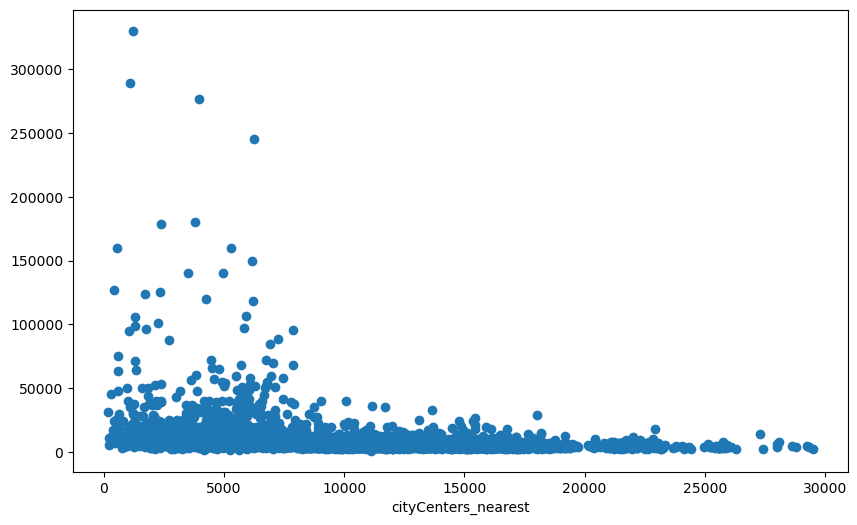

In [60]:
spb_plot = data[data['locality_name'] == 'санкт-петербург'].groupby(
    'cityCenters_nearest').mean()['last_price'].sort_values(ascending=False)
spb_plot.plot(y='last_price', style='o', figsize=(10, 6))

### Общий вывод


Были удалены аномалии  и заменены пропуски. Изменены типы данных для корректного анализа.
Созданы дополнительные столбцы для улучшения анализа данных.
Посчитали и добавили в таблицу цену квадратного метра жилья, 
вывели из даты дни недели, месяцы и года размещения объявлений, 
Аномальное время снятия с продажи квартиры мы устранили, ответы на поставленые вопросы получены. хотя  остались вопросы к данным...
Основны показателм цены, является площадь квартиры, также влияют на цену площадь кухни. и жилая площадь(одно выходит из другого).
В тоже время влияет этаж, средние этажи дороже, чем крайнии. с годами странности запросил бы больше информации.
По СПБ да есть удорожание квартир на приближенность к центру города и оно заметно.
